In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
df=pd.read_csv('mushrooms.csv')

In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#Let's dismiss column "Veil-Type"
df1=df.drop('veil-type',axis=1)

In [6]:
#let's check variance inflation factor.
from scipy.stats import spearmanr 

#df1.corr(method='spearman')

In [7]:
correlation,pval=spearmanr(df1)

In [8]:
corr1=pd.DataFrame(correlation,index=df1.columns,columns=df1.columns)

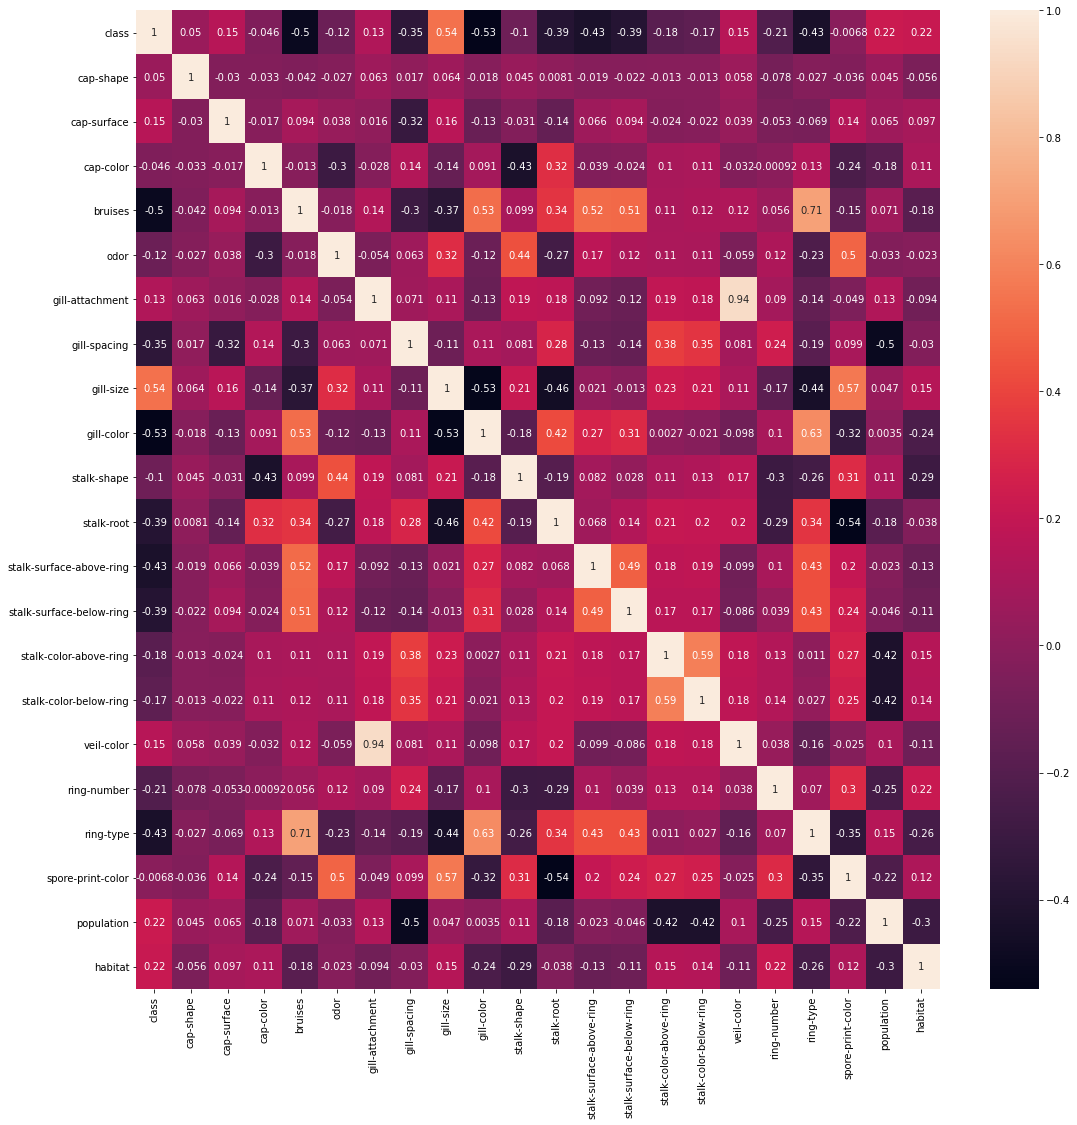

In [9]:
plt.figure(figsize=(18,18))
sns.heatmap(corr1,annot=True)
plt.show()

In [11]:
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()

In [12]:
#split the data into X & Y
 #top 5 features that have high co-relation values w.r.t target
X=df1[['cap-shape','cap-surface','gill-attachment','gill-size','population','habitat']]
Y=df1['class']

In [13]:
df_enc=pd.DataFrame()
for i in X.columns:
    #one hot encoder 
    print('Column: ',i)
    onehot.fit(X[i].values.reshape(-1,1))
    temp=onehot.fit_transform(X[i].values.reshape(-1,1))
    #converting the sparse matrix to dense
    temp=temp.todense() 
    print('Transformed Successfully\n','*'*30)
    #making a dense matrix as a DF
    df=pd.DataFrame(data=temp,columns=onehot.get_feature_names([i])) 
    #dropping the last column to avoid the dummy variable trap
    df=df.iloc[:,:-1] 
    #dropping the last column to avoid the dummy variable trap
    df_enc=pd.concat([df_enc,df],axis=1) 

Column:  cap-shape
Transformed Successfully
 ******************************
Column:  cap-surface
Transformed Successfully
 ******************************
Column:  gill-attachment
Transformed Successfully
 ******************************
Column:  gill-size
Transformed Successfully
 ******************************
Column:  population
Transformed Successfully
 ******************************
Column:  habitat
Transformed Successfully
 ******************************


In [14]:
df_enc.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-surface_f,cap-surface_g,cap-surface_s,gill-attachment_a,gill-size_b,...,population_c,population_n,population_s,population_v,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [15]:
#label-encode the target
from sklearn.preprocessing import LabelEncoder
labenc=LabelEncoder()

In [16]:
labenc.fit(Y)
y=labenc.fit_transform(Y)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(df_enc,y,train_size=.8,random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=10,max_depth=9)

In [20]:
dec.fit(X_train,Y_train)
print('Train score: ',dec.score(X_train,Y_train))
print('Test score: ',dec.score(X_test,Y_test))

Train score:  0.9050623172795814
Test score:  0.8996923076923077


In [21]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve

In [22]:
print('DEC Confusion Matrix')
print('**************************')
print(confusion_matrix(Y_test,dec.predict(X_test)))
cls=classification_report(Y_test,dec.predict(X_test),target_names=['edible','poisonous'])
print(cls)

DEC Confusion Matrix
**************************
[[784  59]
 [104 678]]
              precision    recall  f1-score   support

      edible       0.88      0.93      0.91       843
   poisonous       0.92      0.87      0.89       782

    accuracy                           0.90      1625
   macro avg       0.90      0.90      0.90      1625
weighted avg       0.90      0.90      0.90      1625



In [23]:
# Save the Modle to file in the current working directory
import pickle
#with open('mushrooms_dec_tree', 'wb') as file:  
#    pickle.dump(dec, file)
file=open('mushrooms_dec_tree.pkl','wb')
pickle.dump(dec,file)

In [24]:
# Load the Model back from file
with open('mushrooms_dec_tree.pkl', 'rb') as file:  
    Pickled_Dec_Model = pickle.load(file)

In [25]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_Dec_Model.score(X_test, Y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_Dec_Model.predict(X_test)  

Ypredict

Test score: 89.97 %


array([0, 1, 1, ..., 1, 1, 1])